<a href="https://colab.research.google.com/github/kl2217/finite-element/blob/main/ztest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import scipy.stats as stats

In [119]:
data = {'Patient': range(1, 11),
        'Drug': [6.1, 7.0, 8.2, 7.6, 6.5, 7.8, 6.9, 6.7, 7.4, 5.8],
        'Placebo': [5.2, 7.9, 3.9, 4.7, 5.3, 4.8, 4.2, 6.1, 3.8, 6.3]}
df = pd.DataFrame(data)

In [120]:
t_statistic, p_value = stats.ttest_rel(df['Drug'], df['Placebo'])

In [121]:
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")
#reject H0 for alpha = 0.05

T-statistic: 3.18
P-value: 0.011


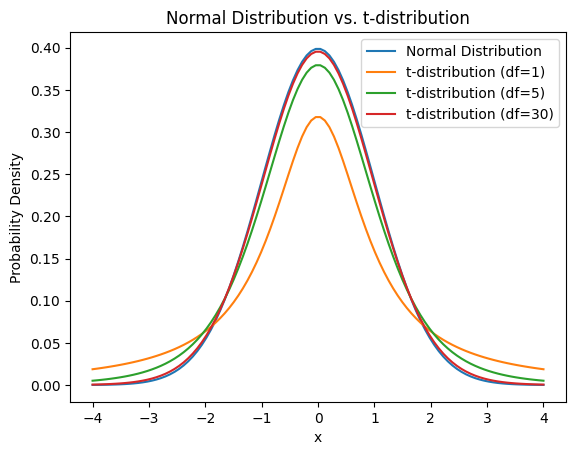

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate x-values
x = np.linspace(-4, 4, 100)

# Calculate normal distribution values
normal_dist = stats.norm.pdf(x)

# Calculate t-distribution values for different degrees of freedom
t_dist_df1 = stats.t.pdf(x, df=1)
t_dist_df5 = stats.t.pdf(x, df=5)
t_dist_df30 = stats.t.pdf(x, df=30)

# Plot the distributions
plt.plot(x, normal_dist, label='Normal Distribution')
plt.plot(x, t_dist_df1, label='t-distribution (df=1)')
plt.plot(x, t_dist_df5, label='t-distribution (df=5)')
plt.plot(x, t_dist_df30, label='t-distribution (df=30)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution vs. t-distribution')
plt.legend()

# Show the plot
plt.show()

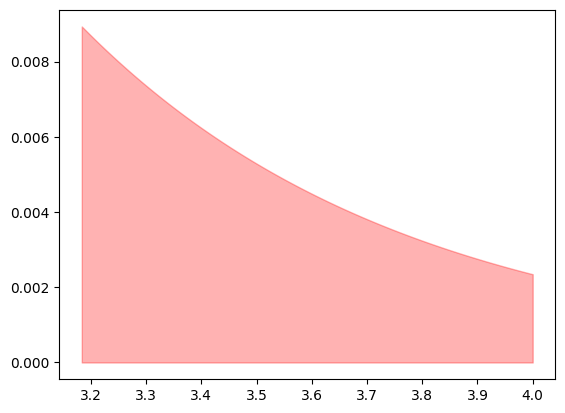

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# ... (previous code for generating distributions) ...

# Calculate t-statistic and p-value
t_statistic, p_value = stats.ttest_rel(df['Drug'], df['Placebo'])

# ... (previous code for plotting distributions) ...

# Shade the p-value area
x_p_value = np.linspace(t_statistic, 4, 100)  # Adjust 4 if needed
plt.fill_between(x_p_value, stats.t.pdf(x_p_value, df=9), color='red', alpha=0.3, label='p-value')

# ... (rest of the plotting code) ...

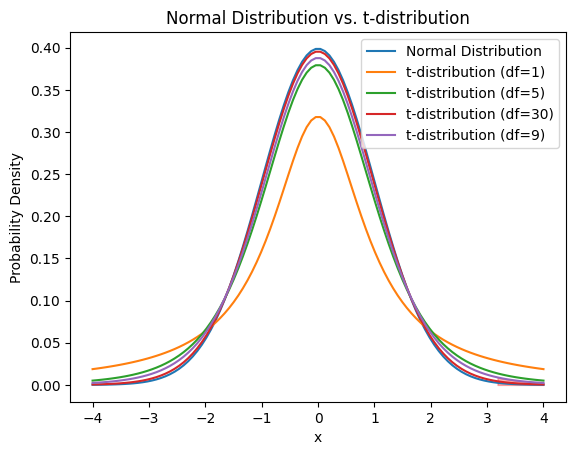

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate x-values
x = np.linspace(-4, 4, 100)

# Calculate normal distribution values
normal_dist = stats.norm.pdf(x)

# Calculate t-distribution values for different degrees of freedom
t_dist_df1 = stats.t.pdf(x, df=1)
t_dist_df5 = stats.t.pdf(x, df=5)
t_dist_df30 = stats.t.pdf(x, df=30)
t_dist_df9 = stats.t.pdf(x, df=9) # t-distribution with df=9

# Plot the distributions
plt.plot(x, normal_dist, label='Normal Distribution')
plt.plot(x, t_dist_df1, label='t-distribution (df=1)')
plt.plot(x, t_dist_df5, label='t-distribution (df=5)')
plt.plot(x, t_dist_df30, label='t-distribution (df=30)')
plt.plot(x, t_dist_df9, label='t-distribution (df=9)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution vs. t-distribution')
plt.legend()

# Calculate t-statistic and p-value
t_statistic, p_value = stats.ttest_rel(df['Drug'], df['Placebo'])

# Shade the p-value area
x_p_value = np.linspace(t_statistic, 4, 100)  # Adjust 4 if needed
plt.fill_between(x_p_value, stats.t.pdf(x_p_value, df=9), color='red', alpha=0.3, label='p-value')

# Show the plot
plt.show()

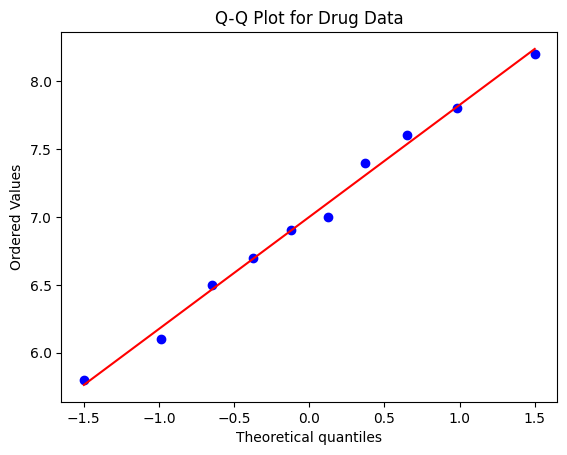

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# ... (previous code for data loading and t-test) ...

# Generate Q-Q plot for drug data
stats.probplot(df['Drug'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Drug Data")
plt.show()

In [126]:
import scipy.stats as stats
import numpy as np

# Calculate the mean and standard error of the difference
diff = df['Drug'] - df['Placebo']
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)  # Standard error of the mean difference

# Calculate the confidence interval
confidence_level = 1 - 0.05  # 95% confidence level
degrees_of_freedom = len(diff) - 1
confidence_interval = stats.t.interval(
    confidence_level, degrees_of_freedom, loc=mean_diff, scale=std_err_diff
)

print(f"Confidence Interval: {confidence_interval}")

# Calculate confidence interval using normal distribution, assuming delta is known and apply z test
confidence_interval_normal = stats.norm.interval(confidence_level, loc=mean_diff, scale=std_err_diff)
print(f"Confidence Interval (assuming z-test): {confidence_interval_normal}")

Confidence Interval: (0.5151684297079777, 3.0448315702920223)
Confidence Interval (assuming z-test): (0.6841325841596739, 2.875867415840326)


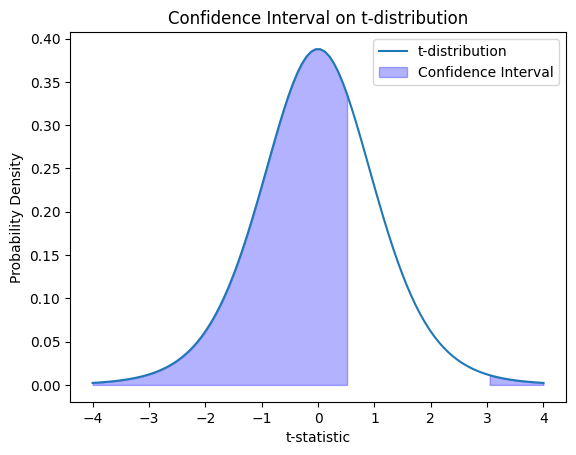

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# ... (previous code for calculating confidence interval) ...

# Generate x-values for the t-distribution
x = np.linspace(-4, 4, 100)

# Calculate t-distribution values with the appropriate degrees of freedom
t_dist = stats.t.pdf(x, df=degrees_of_freedom)

# Plot the t-distribution
plt.plot(x, t_dist, label="t-distribution")

# Shade the confidence interval area
ci_lower_x = np.linspace(-4, confidence_interval[0], 100)
ci_upper_x = np.linspace(confidence_interval[1], 4, 100)

plt.fill_between(ci_lower_x, stats.t.pdf(ci_lower_x, df=degrees_of_freedom), color="blue", alpha=0.3, label="Confidence Interval")
plt.fill_between(ci_upper_x, stats.t.pdf(ci_upper_x, df=degrees_of_freedom), color="blue", alpha=0.3)

# Add labels and legend
plt.xlabel("t-statistic")
plt.ylabel("Probability Density")
plt.title("Confidence Interval on t-distribution")
plt.legend()

# Show the plot
# 95% sure the true mean is somewhere in Confidence Interval: (0.5151684297079777, 3.0448315702920223)
# in another words, 95% sure they are not in the shaded area. 0 happens to be in the area.
# so reject H0 with alpha = 0.05
plt.show()

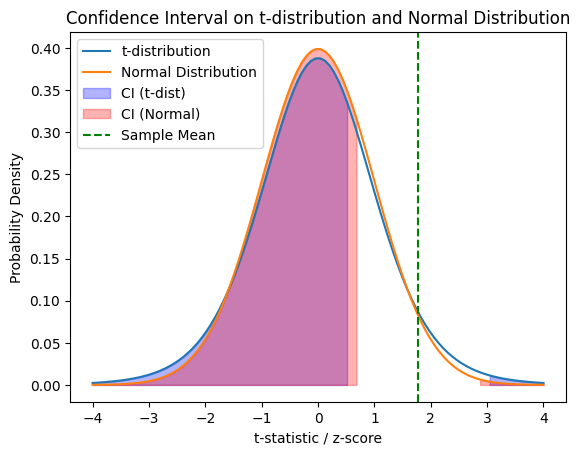

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# ... (your data loading and previous calculations) ...

# Generate x-values for the distributions
x = np.linspace(-4, 4, 100)

# Calculate t-distribution values with the appropriate degrees of freedom
t_dist = stats.t.pdf(x, df=degrees_of_freedom)

# Calculate normal distribution values
normal_dist = stats.norm.pdf(x)

# Plot the distributions
plt.plot(x, t_dist, label="t-distribution")
plt.plot(x, normal_dist, label="Normal Distribution")

# Shade the confidence interval area on t-distribution
ci_lower_x_t = np.linspace(-4, confidence_interval[0], 100)
ci_upper_x_t = np.linspace(confidence_interval[1], 4, 100)
plt.fill_between(ci_lower_x_t, stats.t.pdf(ci_lower_x_t, df=degrees_of_freedom), color="blue", alpha=0.3)
plt.fill_between(ci_upper_x_t, stats.t.pdf(ci_upper_x_t, df=degrees_of_freedom), color="blue", alpha=0.3, label="CI (t-dist)")

# Shade the confidence interval area on normal distribution
# Calculate confidence interval using normal distribution
confidence_interval_normal = stats.norm.interval(confidence_level, loc=mean_diff, scale=std_err_diff)
ci_lower_x_normal = np.linspace(-4, confidence_interval_normal[0], 100)
ci_upper_x_normal = np.linspace(confidence_interval_normal[1], 4, 100)
plt.fill_between(ci_lower_x_normal, stats.norm.pdf(ci_lower_x_normal), color="red", alpha=0.3)
plt.fill_between(ci_upper_x_normal, stats.norm.pdf(ci_upper_x_normal), color="red", alpha=0.3, label="CI (Normal)")

# Add vertical line for sample mean
plt.axvline(mean_diff, color="green", linestyle="--", label="Sample Mean")

# Add labels and legend
plt.xlabel("t-statistic / z-score")
plt.ylabel("Probability Density")
plt.title("Confidence Interval on t-distribution and Normal Distribution")
plt.legend()

# Show the plot
# due to t-test's uncertainty about delta, compare with z-test, some rejection power is lost
plt.show()